### Generating Hume-like gibberish

This document is a demo for my LSTM implementation.

In [1]:
import string
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.optim import Adam

from training import train
from data_handling import DataLoader
from model import LSTM

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
all_letters = string.ascii_letters + " 0123456789!?,.:;'()[]-$"

In [4]:
data_loader = DataLoader("hume.txt", 
                         all_letters=all_letters, 
                         seq_length=500, 
                         device=device, 
                         verbose=True)

precomputing data tensors...
20.00%
39.99%
59.99%
79.99%
99.98%
100%: done


In [5]:
rnn = LSTM(n_input=data_loader.n_letters, 
           n_hidden=512, 
           n_output=data_loader.n_letters, 
           n_layers=3,
           dropout=0.1, 
           grad_clipping=5).to(device)

In [7]:
training_params = {
    'number of iterations':3000,
    'batch size':128,
    'subsequence length':100,
    'learning rate':0.0005
}

output_params = {
    'plot every':50,
    'print every':200
}

iters, losses = train(rnn, data_loader, training_params, output_params)

  1m 50s (200 6.67%) loss: 0.00013
  3m 39s (400 13.33%) loss: 0.00010
  5m 28s (600 20.00%) loss: 0.00008
  7m 20s (800 26.67%) loss: 0.00008
  9m 11s (1000 33.33%) loss: 0.00007
 11m  4s (1200 40.00%) loss: 0.00007
 12m 52s (1400 46.67%) loss: 0.00006
 14m 43s (1600 53.33%) loss: 0.00006
 16m 35s (1800 60.00%) loss: 0.00006
 18m 26s (2000 66.67%) loss: 0.00006
 20m 15s (2200 73.33%) loss: 0.00006
 22m  7s (2400 80.00%) loss: 0.00006
 23m 55s (2600 86.67%) loss: 0.00006
 25m 46s (2800 93.33%) loss: 0.00005
 27m 33s (3000 100.00%) loss: 0.00005


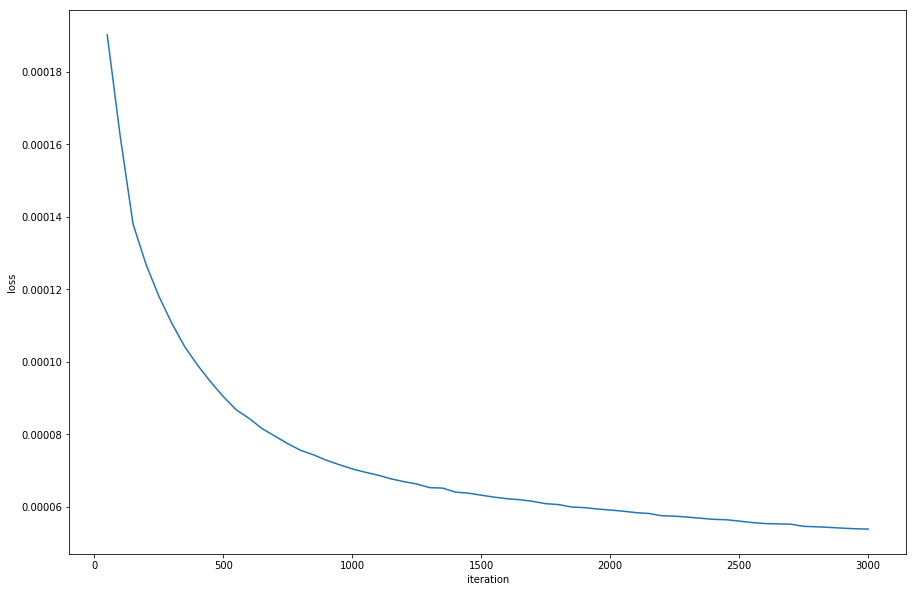

In [10]:
plt.figure(figsize=(15,10))
plt.plot(iters, losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

### Testing output

Here, we can finally sample from the learned distribution.

In [9]:
max_sample_length = 2000

def sample(starting_with="", temperature=1):
    verse = starting_with
    with torch.no_grad():
        rnn.eval()
        letter = "$" + starting_with
        state = rnn.init_state(data_loader.seq2tensor(letter, truncate=False).unsqueeze(1).to(device))
        for i in range(max_sample_length):
            input_tensor = data_loader.seq2tensor(letter, truncate=False).unsqueeze(1).to(device)
            output, state = rnn.sample(input_tensor, state, temperature)
            probs = np.exp(output[-1].squeeze().cpu().numpy())
            letter = np.random.choice(list(data_loader.all_letters), p=probs)
            if letter == "$":
                return verse
            verse += letter
    return verse

for i in range(10):
    print(sample("", temperature=0.9) + '\n')

The former, both in their natural and inflexible objects.

This is even this reasoning, I can employ us in a continued chain of conception. We may pretend to blood all causes, which he conceives to be charmal. Nor is this better suppos'd perceived, that, or the influence on the human mind in place with the primary, who, in all the greatest disadvantages; not much more totally delightful, as the source of all the ancient heights; and though one thing is more much idea with that which are incapable of trade and causes; but the reason, why when different on the imagination, from an object of the other. These passions are essential to it. But 'tis therefore contrary to any thing; this lies only when we form the whole idea of power or necessary connexion, we shou'd every distinction betwixt the clearer and impressions, he need only trust ourselves in a like form of government.

Catheas I have really her motives during the productions of Hamazy which were secured among the world. The sceptic

How is this rule wou'd be demanded, but must suppose it as any answer, that hurtful and alteration in the person more contrary to that of our interest in a superior power. But it is not it follows, that we cannot admit of no relation, I shmould possibly be found to conclude, that the philosopher, if we should attach the consequence of the former, and that the object we can admit of this knowledge, it must be allow'd to be implying without any reflection. It is not a difference in the case of fact and fiction. Since therefore our sensations resemble the passions and relations, but not only on account of their original impression, which will commonly give place in considering the changes of the internal and creature. Where the influence of our impressions are more influenced by a common nature, than where the object or sentiment or character is, therefore, on the contrary, the second dissolution of the mind are to encrease our perceptions from one species. The only object of the mind may